/Users/natalie/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib
/Users/natalie/cloudsat/tc_test_granules/17996-CHOI-WAN/2009258025846_17996_CS_2B-GEOPROF_GRANULE_P_R04_E02.hdf.he2
(125, 1818)


pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy


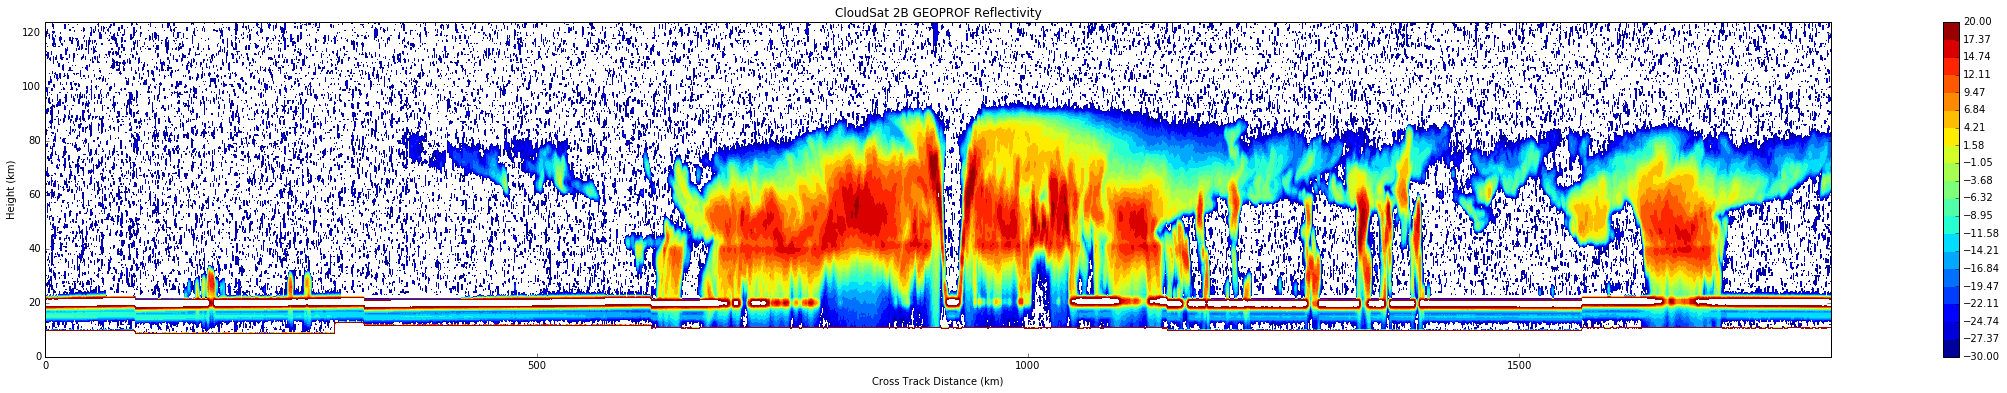

In [2]:
import Nio
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy.interpolate

%pylab inline

#import plotly.plotly as py
#from plotly.graph_objs import *
#py.sign_in('natalie.tourville', '04ripipjbz')

work_dir = '/Users/natalie/cloudsat/tc_test_granules/'
tc_work_dir = '17996-CHOI-WAN/'
tc_file = '2009258025846_17996_CS_2B-GEOPROF_GRANULE_P_R04_E02.hdf' + '.he2'
geoprof_file = work_dir + tc_work_dir + tc_file
print geoprof_file
gfile = Nio.open_file(geoprof_file)

# Now load the variables to plot, we want Reflectivity
gtime = gfile.variables['Profile_time_2B_GEOPROF'][:]
gheight = gfile.variables['Height_2B_GEOPROF'][:]
greflect = gfile.variables['Radar_Reflectivity_2B_GEOPROF'][:]

greflect_offset = gfile.attributes['Radar_Reflectivity_offset_2B_GEOPROF']
greflect_factor = gfile.attributes['Radar_Reflectivity_factor_2B_GEOPROF']
greflect_missing = gfile.attributes['Radar_Reflectivity_missing_2B_GEOPROF']
gheight_offset = gfile.attributes['Height_offset_2B_GEOPROF']
gheight_factor = gfile.attributes['Height_factor_2B_GEOPROF']

#print greflect_offset
#print greflect_factor
#print greflect_missing

greflect = (greflect + greflect_offset)/greflect_factor
gheight = (gheight + gheight_offset)/gheight_factor

#print greflect

# Rotate data set 90 cc and reverse.
greflect = np.fliplr(greflect)
greflect = np.rot90(greflect,3)

gheight = np.fliplr(gheight)
gheight = np.rot90(gheight,3)

#print greflect
print greflect.shape

# Height in meters.
#print gheight

size = 1818
# x values
x = np.arange(size)
# y values
y = np.arange(125) 
# What we want to plot [125,numpoints]
z = np.ma.array(greflect)

v = np.linspace(-30.0, 20.0, 20, endpoint=True)#, retstep=True, step=5.0)
X,Y = np.meshgrid(x,y)

#cs = plt.contour(X,Y,greflect, v, linewidths=0.5, colors='k')
fig = plt.figure(figsize=(40,6))
cs = plt.contourf(X,Y,z, v, cmap=plt.cm.jet, vmin=-30.0, vmax=20.0)
q = plt.colorbar(ticks=v)

plt.title("CloudSat 2B GEOPROF Reflectivity")
plt.xlabel("Cross Track Distance (km)")
plt.ylabel("Height (km)")
plt.show()
#data = Data([
#   Contour(
#      z=z,
#        x=x,
#        y=y
#    )
#])
#plot_url = py.plot(data, filename='simple-contour')
plt.savefig("geoprof.png")

In [5]:
gfile.variables.keys()


['Profile_time_2B_GEOPROF',
 'Data_targetID_2B_GEOPROF',
 'Longitude_2B_GEOPROF',
 'Data_status_2B_GEOPROF',
 'SurfaceHeightBin_2B_GEOPROF',
 'Sigma_Zero_2B_GEOPROF',
 'MODIS_cloud_flag_2B_GEOPROF',
 'DEM_elevation_2B_GEOPROF',
 'MODIS_scene_var_2B_GEOPROF',
 'MODIS_Cloud_Fraction_2B_GEOPROF',
 'Radar_Reflectivity_2B_GEOPROF',
 'sem_NoiseFloorVar_2B_GEOPROF',
 'CPR_Echo_Top_2B_GEOPROF',
 'Pitch_offset_2B_GEOPROF',
 'SurfaceHeightBin_fraction_2B_GEOPROF',
 'Latitude_2B_GEOPROF',
 'Vertical_binsize_2B_GEOPROF',
 'Gaseous_Attenuation_2B_GEOPROF',
 'sem_NoiseGate_2B_GEOPROF',
 'Data_quality_2B_GEOPROF',
 'sem_NoiseFloor_2B_GEOPROF',
 'Range_to_intercept_2B_GEOPROF',
 'Height_2B_GEOPROF',
 'Roll_offset_2B_GEOPROF',
 'TAI_start_2B_GEOPROF',
 'CPR_Cloud_mask_2B_GEOPROF',
 'Navigation_land_sea_flag_2B_GEOPROF',
 'Clutter_reduction_flag_2B_GEOPROF',
 'UTC_start_2B_GEOPROF',
 'MODIS_scene_char_2B_GEOPROF']

In [4]:
gfile.attributes.keys()

['Data_status_long_name_2B_GEOPROF',
 'product_version_2B_GEOPROF',
 'Vertical_binsize_offset_2B_GEOPROF',
 'Radar_Reflectivity_factor_2B_GEOPROF',
 'MODIS_scene_var_missing_2B_GEOPROF',
 'Longitude_units_2B_GEOPROF',
 'MODIS_scene_char_valid_range_2B_GEOPROF',
 'DEM_elevation_missing_2B_GEOPROF',
 'CPR_Echo_Top_missop_2B_GEOPROF',
 'Range_to_intercept_factor_2B_GEOPROF',
 'Sigma_Zero_valid_range_2B_GEOPROF',
 'Data_targetID_valid_range_2B_GEOPROF',
 'sem_NoiseFloor_offset_2B_GEOPROF',
 'Sigma_Zero_factor_2B_GEOPROF',
 'Gaseous_Attenuation_missop_2B_GEOPROF',
 'SurfaceHeightBin_offset_2B_GEOPROF',
 'Data_quality_long_name_2B_GEOPROF',
 'Longitude_valid_range_2B_GEOPROF',
 'MODIS_cloud_flag_factor_2B_GEOPROF',
 'Clutter_reduction_flag_factor_2B_GEOPROF',
 'MODIS_Cloud_Fraction_missing_2B_GEOPROF',
 'UTC_start_long_name_2B_GEOPROF',
 'Navigation_land_sea_flag_factor_2B_GEOPROF',
 'Pitch_offset_factor_2B_GEOPROF',
 'SurfaceHeightBin_fraction_factor_2B_GEOPROF',
 'start_time_2B_GEOPROF',
 